In [386]:
from datetime import datetime 
from concurrent import futures 
import pandas as pd
import pandas_datareader.data as web

%matplotlib inline

end = datetime.now() 
start = datetime(end.year - 5, end.month , end.day)
bad = []

def download(ticker):
    try:
        df = web.DataReader(ticker,'iex', start, end)
        df.to_csv(f"spy/{ticker}.csv")
    except Exception as e:
        bad.append(ticker)
        print(f"{ticker}: {e}")

    

In [38]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table = data[0]
tickers = table[1:][0].tolist()
tickers[:5]

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN']

In [29]:
bad = []
with futures.ThreadPoolExecutor(50) as executor: 
    res = executor.map(download, tickers) 

In [30]:
bad

[]

In [39]:
pd.Series(tickers).to_csv("spy/tickers.csv")

In [140]:
tickers = pd.read_csv('spy/tickers.csv', header=None)[1].tolist()

In [219]:
import backtrader as bt
import numpy as np

determine the long or short capitol $w_i$ allocated to the $i^{th}$ stock

$w_i = -$

In [347]:
class CrossSectionalMR(bt.Strategy):
    def __init__(self):
        pass 

    def prenext(self):
        self.next()
    
    def next(self):
        available = list(filter(lambda d: len(d), self.datas)) # only look at data that existed yesterday
        rets = np.zeros(len(available))
        for i, d in enumerate(available):
            rets[i] = (d.close[0]- d.close[-1]) / d.close[-1]

        market_ret = np.mean(rets)
        weights = -(rets - market_ret)
        weights = weights / np.sum(np.abs(weights))
        for i, d in enumerate(available):
            self.order_target_percent(d, target=weights[i])
        

In [403]:
cerebro = bt.Cerebro(stdstats=False)
cerebro.broker.set_coc(True)

for ticker in tickers:
    data = bt.feeds.GenericCSVData(
        fromdate=start,
        todate=end,
        dataname=f"spy/{ticker}.csv",
        dtformat=('%Y-%m-%d'),
        openinterest=-1,
        nullvalue=0.0,
        plot=False
    )
    cerebro.adddata(data)

cerebro.broker.setcash(1_000_000)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.Returns)
cerebro.addanalyzer(bt.analyzers.DrawDown)
cerebro.addstrategy(CrossSectionalMR)
results = cerebro.run()

<IPython.core.display.Javascript object>


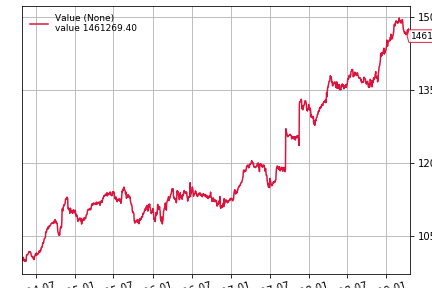

[[<Figure size 432x288 with 1 Axes>]]

In [404]:
cerebro.plot()

In [405]:
results[0].analyzers.sharperatio.get_analysis()

OrderedDict([('sharperatio', 1.1649849560346623)])

In [406]:
results[0].analyzers.returns.get_analysis()

OrderedDict([('rtot', 0.37930551159445897),
             ('ravg', 0.000301514715098934),
             ('rnorm', 0.07894283817549451),
             ('rnorm100', 7.894283817549451)])

In [407]:
results[0].analyzers.drawdown.get_analysis()

AutoOrderedDict([('len', 36),
                 ('drawdown', 2.4979082947984224),
                 ('moneydown', 37436.29389999388),
                 ('max',
                  AutoOrderedDict([('len', 213),
                                   ('drawdown', 6.591974453739492),
                                   ('moneydown', 75822.93300001463)]))])

In [146]:
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS